## 情人节词云示例

### 1.引入相关的库包：

In [2]:
#coding:utf-8
__author__ = 'Hanxiaoyang'
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas   
import matplotlib.pyplot as plt

from wordcloud import WordCloud#词云包

### 2.导入大话西游txt文件，分词：

In [4]:
#file=codecs.open(u"蒋亦宁.txt",'r')
file=codecs.open(u"把根留住.txt",'r')
content=file.read()
file.close()
segment=[]
segs=jieba.cut(content) #切词，“么么哒”才能出现
for seg in segs:
    if len(seg)>1 and seg!='\r\n':
        segment.append(seg)
segment

[u'\u5fae\u4fe1',
 u'\u6d88\u606f',
 u'\u8bb0\u5f55',
 u'\u5bfc\u51fa',
 u'\u65f6\u95f4',
 u'2017',
 u'04',
 u'07',
 u'14',
 u'58',
 u'53',
 u'ID',
 u'\u65f6\u95f4',
 u'\u8054\u7cfb\u4eba',
 u'\u72b6\u6001',
 u'\u7c7b\u578b',
 u'\u6d88\u606f',
 u'2949393829',
 u'chatroom',
 u'2017',
 u'02',
 u'17',
 u'10',
 u'07',
 u'56',
 u'\u5415\u7426',
 u'\u63a5\u6536',
 u'\u6587\u672c',
 u'\u5584\u89e3',
 u'\u4eba\u8863',
 u'2949393829',
 u'chatroom',
 u'2017',
 u'02',
 u'17',
 u'10',
 u'07',
 u'56',
 u'\u63a5\u6536',
 u'\u7cfb\u7edf',
 u'\u6d88\u606f',
 u'\u9633\u9633',
 u'\u9080\u8bf7',
 u'\u52a0\u5165',
 u'\u7fa4\u804a',
 u'\u7fa4\u804a',
 u'\u53c2\u4e0e',
 u'\u8fd8\u6709',
 u'\u5218\u9c81\u6770',
 u'\u6d77\u6d9b',
 u'\u4e50\u6bc5',
 u'\u8c22\u7389',
 u'\u9648\u5f3a',
 u'\u4faf\u9ece',
 u'\u5415\u7426',
 u'\u5218\u946b',
 u'\u9648\u987a',
 u'2949393829',
 u'chatroom',
 u'2017',
 u'02',
 u'17',
 u'10',
 u'08',
 u'00',
 u'\u5218\u9c81\u6770',
 u'\u63a5\u6536',
 u'\u6587\u672c',
 u'\u9633\u9633',


### 3.去停用词（“多喝热水”和闹嘴的小细节可以在这里抹去）

In [10]:
words_df=pandas.DataFrame({'segment':segment})
words_df.head()
stopwords=pandas.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'],encoding="utf8")
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_df


,segment
0,微信
2,记录
3,导出
4,时间
11,ID
12,时间
13,联系人
14,状态
15,类型
28,善解


### 4.统计词频（情侣对话日常高频词）

In [11]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort(columns="计数",ascending=False)
#words_stat
a = dict()
for item in list(words_stat.head(1000).itertuples(index=False)):
    a[tuple(item)[0]] = tuple(item)[1]
    
#a
words_stat

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,segment,计数
3464,杭州,48
4391,行长,45
2933,感觉,45
2951,成都,44
1784,刘行,43
3495,根儿,42
1098,上海,42
1912,华为,41
1649,公司,41
1283,乐哥,41


### 5.做词云（开启亮瞎眼么么哒模式）

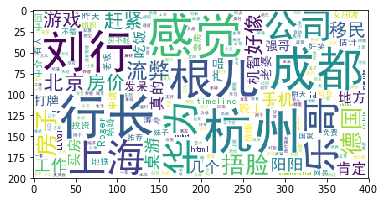

In [13]:
%matplotlib inline
#import matplotlib.pyplot as plt
wordcloud=WordCloud(font_path="simhei.ttf",background_color="white")
#a = numpy.asarray((1,1),(1,2))
#words_stat.head(1000).to_records(index=False).tolist()
wordcloud=wordcloud.fit_words(a)
#plt.figure()                           
plt.imshow(wordcloud)
plt.show()

Using matplotlib backend: Qt5Agg


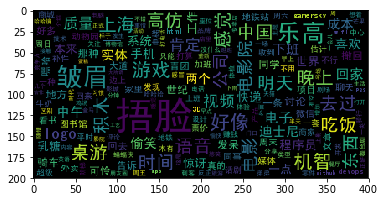

In [108]:
%matplotlib
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.fit_words(a)
plt.imshow(wordcloud)
plt.show()

### 6.自定义背景图做词云（让他看到你的心）

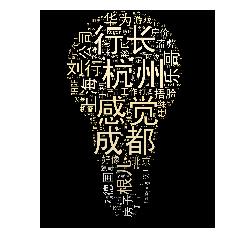

In [27]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
%matplotlib inline
#bimg=imread('alice.png')
bimg=imread('bulb.jpg')
wordcloud=WordCloud(background_color="black",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(a)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()

from os import path
#d = path.dirname(__file__)
d = path.dirname('.') 
#wordcloud.to_file(path.join(d, "love.jpg"))
wordcloud.to_file(path.join(d, "dick.jpg"))  

Using matplotlib backend: Qt5Agg


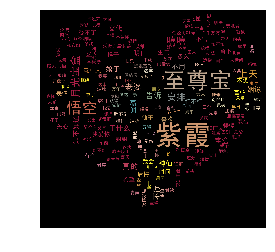

In [85]:
%matplotlib
bimg=imread('heart.jpeg')
wordcloud=WordCloud(background_color="black",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(a)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()